Описание данных
wellName Название скважины

datasetName Название набора данных

MD Измеренная глубина

BK Боковой каротаж (сопротивление)

Facies Фация (свойство)

GR Гамма-каротаж

LIT Литология

NKTB Нейтронный каротаж

SP Метод потенциалов собственной поляризации

Здесь тоже важно нормализацию проводить поскважинно и с учетом значений в глинах и плотных породах на большом интервале

Здесь тоже важно нормализацию проводить поскважинно и с учетом значений в глинах и коллекторах на большом интервале

Нужно определять фации в коллеторах (LIT = 4)

1 – глина

2 – алевролит

5- плотная порода

6 - уголь

Здесь тоже важно нормализацию проводить поскважинно и с учетом значений в глинах и плотных породах на большом интервале

Здесь тоже важно нормализацию проводить поскважинно и с учетом значений в глинах и коллекторах на большом интервале, но не выше 2000 м (MD>2000)

Самые основные конечно – GR и SP, их форму геологи учитывают для определения условий осадконакопления, можно будет попробовать оценить форму кривых, а не значения параметра) Единственный нюанс – пока в таблице всего 19 скважин, но фации в них выделены наиболее уверенно. Ну и судя по всему, информация с MD < 2000 не принципиальна

SP (каротаж естественной поляризации)
GR (гамма каротаж)
DT (акустический каротаж)
Density (плотностной каротаж)

In [456]:
# Загружаем необходимые библиотеки
import pandas as pd
import numpy as np
import random as rd
import seaborn as sns
import lasio
from os import listdir
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, cross_val_predict, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from IPython.display import display, clear_output
from sklearn.model_selection import StratifiedKFold
%matplotlib inline

In [457]:
name_dataset = 'DATATRAIN18+LAYER.csv'

In [490]:
def get_for_learn_clean_df(statistic_df):
    feature = statistic_df.copy()
    del feature['datasetName']
    #feature = feature[feature["Facies"] >= -999]
    feature = feature[feature["BK"] >= -999]
    feature = feature[feature["SP"] >= -999]
    return feature


for_ml = get_for_learn_clean_df(pd.read_csv(name_dataset, sep=';'))
display(for_ml.describe())
display(for_ml[for_ml["Facies"] == 7].describe())
display(for_ml)
display(for_ml[for_ml["Facies"] > -999].describe())

MD           BK        Facies            GR           LIT  \
count  69846.000000  69846.00000  69846.000000  69846.000000  69846.000000   
mean    2146.093572     16.88084  -9575.889128   -942.107587  -7686.804384   
std      402.355621    194.48259   2013.442132   2937.741651   4216.454069   
min      721.000000     -6.90000  -9999.000000  -9999.000000  -9999.000000   
25%     1892.000000      5.19000  -9999.000000      6.960000  -9999.000000   
50%     2189.600000      7.02000  -9999.000000      9.194000  -9999.000000   
75%     2455.800000      9.50000  -9999.000000     11.660000  -9999.000000   
max     3093.000000  22739.52000     12.000000    142.370000      6.000000   

               NKTB            SP  
count  69846.000000  69846.000000  
mean    -943.411154    107.161288  
std     2928.513258     39.107406  
min    -9999.000000     -1.588982  
25%        2.770405     82.653728  
50%        3.483779    105.993450  
75%        4.080404    123.194050  
max       14.500000    578.255500

MD         BK  Facies          GR         LIT        NKTB  \
count   635.000000  635.00000   635.0  635.000000  635.000000  635.000000   
mean   2676.363780   12.43022     7.0    8.431178    3.212598    4.796372   
std     179.237937   11.04495     0.0    2.228323    1.396424    0.652793   
min    2532.400000    3.92900     7.0    4.515000    1.000000    3.392938   
25%    2549.100000    6.50450     7.0    6.559500    2.000000    4.359206   
50%    2605.800000   10.32100     7.0    8.310000    4.000000    4.694145   
75%    2691.300000   15.71050     7.0    9.915000    4.000000    5.205000   
max    3050.400000  124.25700     7.0   15.775000    5.000000    7.856283   

               SP  
count  635.000000  
mean   114.317309  
std     36.825378  
min     52.900000  
25%     90.887195  
50%    100.782700  
75%    147.673100  
max    205.800300

wellName      MD       BK  Facies      GR  LAYER   LIT      NKTB  \
0       spk1521  2011.0    4.420   -9999  13.600  -9999 -9999  2.968678   
1       spk1521  2011.2    4.300   -9999  13.510  -9999 -9999  2.937724   
2       spk1521  2011.4    4.310   -9999  13.170  -9999 -9999  2.973814   
3       spk1521  2011.6    4.280   -9999  13.030  -9999 -9999  2.989185   
4       spk1521  2011.8    4.260   -9999  12.940  -9999 -9999  2.968678   
5       spk1521  2012.0    4.410   -9999  12.640  -9999 -9999  3.024832   
6       spk1521  2012.2    4.500   -9999  12.610  -9999 -9999  3.055148   
7       spk1521  2012.4    5.000   -9999  12.930  -9999 -9999  3.105200   
8       spk1521  2012.6    4.750   -9999  13.440  -9999 -9999  3.139893   
9       spk1521  2012.8    4.590   -9999  13.410  -9999 -9999  3.115140   
10      spk1521  2013.0    4.630   -9999  13.230  -9999 -9999  3.134954   
11      spk1521  2013.2    4.980   -9999  12.770  -9999 -9999  3.134954   
12      spk1521  2013.4    5.020   -9999  12.370  -9999 -9999  3.100220   
13      spk1521  2013.6    4.300   -9999  12.090  -9999 -9999  3.024832   
14      spk1521  2013.8    3.890   -9999  12.330  -9999 -9999  3.045067   
15      spk1521  2014.0    3.740   -9999  12.810  -9999 -9999  3.125058   
16      spk1521  2014.2    3.930   -9999  13.390  -9999 -9999  3.203604   
17      spk1521  2014.4    4.180   -9999  13.720  -9999 -9999  3.188983   
18      spk1521  2014.6    4.460   -9999  14.300  -9999 -9999  3.065205   
19      spk1521  2014.8    4.500   -9999  14.750  -9999 -9999  3.080247   
20      spk1521  2015.0    4.420   -9999  14.560  -9999 -9999  3.154678   
21      spk1521  2015.2    4.270   -9999  14.230  -9999 -9999  3.164507   
22      spk1521  2015.4    4.000   -9999  14.300  -9999 -9999  3.110173   
23      spk1521  2015.6    4.120   -9999  14.250  -9999 -9999  3.100220   
24      spk1521  2015.8    4.280   -9999  14.000  -9999 -9999  3.154678   
25      spk1521  2016.0    4.180   -9999  14.090  -9999 -9999  3.184098   
26      spk1521  2016.2    4.210   -9999  14.130  -9999 -9999  3.188983   
27      spk1521  2016.4    4.250   -9999  13.940  -9999 -9999  3.115140   
28      spk1521  2016.6    4.240   -9999  13.680  -9999 -9999  3.060180   
29      spk1521  2016.8    4.140   -9999  13.180  -9999 -9999  3.019758   
...         ...     ...      ...     ...     ...    ...   ...       ...   
125038  spk432R  2678.2   11.835   -9999   9.725    UV3     1  4.011883   
125039  spk432R  2678.4   12.405   -9999  12.645    UV3     1  3.459317   
125040  spk432R  2678.6   17.880   -9999  13.365    UV3     1  3.301441   
125041  spk432R  2678.8   18.137   -9999  11.735    UV3     1  3.465297   
125042  spk432R  2679.0   13.233   -9999  10.627    UV3     1  3.839057   
125043  spk432R  2679.2   13.055   -9999  10.746    UV3     1  4.188297   
125044  spk432R  2679.4   12.781   -9999  12.202    UV3     1  3.759521   
125045  spk432R  2679.6   17.643   -9999  13.981    UV3     1  3.381576   
125046  spk432R  2679.8   18.698   -9999  13.490    UV3     1  3.251806   
125047  spk432R  2680.0   15.659   -9999  11.812    UV3     1  3.999325   
125048  spk432R  2680.2   14.257   -9999  10.172    UV3     6  3.128017   
125049  spk432R  2680.4   16.439   -9999   8.770    UV3     6  2.544355   
125050  spk432R  2680.6   64.538   -9999   9.315    UV3     6  2.314718   
125051  spk432R  2680.8   21.523   -9999  12.135    UV3     6  2.745886   
125052  spk432R  2681.0   11.473   -9999  13.845    UV3     1  4.140456   
125053  spk432R  2681.2    9.725   -9999  13.083    UV3     1  4.608701   
125054  spk432R  2681.4    7.780   -9999  12.281    UV3     1  4.175141   
125055  spk432R  2681.6    9.353   -9999  10.920    UV3     2  4.329429   
125056  spk432R  2681.8    9.295   -9999  10.729    UV3     2  4.737274   
125057  spk432R  2682.0    9.345   -9999  10.200    UV3     2  4.988441   
125058  spk432R  2682.2    9.935   -9999   8.960    UV3     4  4.749235   
125059  spk432R  2682.4   10.619

MD           BK      Facies           GR          LIT  \
count  2954.000000  2954.000000  2954.00000  2954.000000  2954.000000   
mean   2606.556364    10.946255     5.26608  -617.385604  -126.428910   
std     127.306556    11.162536     2.38241  2425.357626  1127.203192   
min    2507.600000     3.414000     0.00000 -9999.000000 -9999.000000   
25%    2547.600000     6.800000     5.00000     6.810000     1.000000   
50%    2568.200000     8.600000     5.00000     8.766500     1.000000   
75%    2595.600000    11.700000     7.00000    10.902250     4.000000   
max    3086.200000   231.100000    12.00000    18.340000     5.000000   

              NKTB           SP  
count  2954.000000  2954.000000  
mean   -622.073894   112.325442  
std    2424.144060    32.675092  
min   -9999.000000    49.395160  
25%       3.760663    93.534067  
50%       4.237521   108.352350  
75%       4.764340   124.523150  
max       8.589926   207.469100

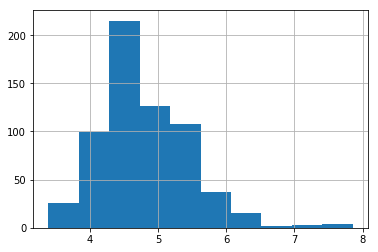

In [491]:
for_ml[for_ml["Facies"]== 7]['NKTB'].hist()
#for_ml[for_ml["Facies"]== 7]['BK'].hist()
#for_ml[for_ml["Facies"]== 7]['SP'].hist()

In [671]:
def get_well_with_last_features(well, count_features, step_md):
    def add_feature_column_last(well_copy, max_count, name):
        for i in range(step_md, max_count, step_md):
            well_copy[name + '_last_' + str(i)] = -9999
            well_copy[name + '_last_' + str(i)] = well_copy[name].shift(periods=-i).rolling(window=4,center=True).min()

    def add_feature_column_next(well_copy, max_count, name):
        for i in range(step_md, max_count, step_md):
            well_copy[name + '_next_' + str(i)] = -9999
            well_copy[name + '_next_' + str(i)] = well_copy[name].shift(periods=+i).rolling(window=4,center=True).min()

    def add_feature_stradle(well_copy, name, step):
        min_last = well_copy[name].shift(periods=-step).rolling(window=8,center=True).min()
        max_last = well_copy[name].shift(periods=-step).rolling(window=8,center=True).max()
        well_copy[name + '_last_max_min_' + str(step)] = max_last - min_last
        #well_copy[name + '_last_max_' + str(step)] = max_last
        #well_copy[name + '_last_min_' + str(step)] = min_last
        
        min_next = well_copy[name].shift(periods=+step).rolling(window=8,center=True).min()
        max_next = well_copy[name].shift(periods=+step).rolling(window=8,center=True).max()
        well_copy[name + '_next_max_min_' + str(step)] = max_next - min_next
        
        #well_copy[name + '_next_min_' + str(step)] = well_copy[name].shift(periods=+step).rolling(window=10,center=True).min()
        #well_copy[name + '_last_max_' + str(step)] = well_copy[name].shift(periods=-step).rolling(window=10,center=True).max()
        #well_copy[name + '_next_max_' + str(step)] = well_copy[name].shift(periods=+step).rolling(window=10,center=True).max()

    max_count = count_features
    well_copy = well.copy()
    #add_feature_column_last(well_copy, max_count, 'GR')
    #add_feature_column_last(well_copy, max_count, 'SP')
    add_feature_column_last(well_copy, max_count, 'BK')
    #add_feature_column_last(well_copy, max_count, 'NKTB')

    #add_feature_column_next(well_copy, max_count, 'GR')
    #add_feature_column_next(well_copy, max_count, 'SP')
    add_feature_column_next(well_copy, max_count, 'BK')
    #add_feature_column_next(well_copy, max_count, 'NKTB')

    add_feature_stradle(well_copy, 'BK', 0)
    add_feature_stradle(well_copy, 'SP', 0)
    add_feature_stradle(well_copy, 'BK', 0)
    add_feature_stradle(well_copy, 'NKTB', 0)

    for i in range(step_md, max_count, step_md):  
        add_feature_stradle(well_copy, 'BK', i)
        add_feature_stradle(well_copy, 'SP', i)
        add_feature_stradle(well_copy, 'BK', i)
        add_feature_stradle(well_copy, 'NKTB', i)

    return well_copy


from sklearn import preprocessing
def get_preprocessing_well_df_(all_well_df):
    
    from sklearn_pandas import DataFrameMapper
    import multiprocessing as mp
    import ml_multiproz
    wall_names = all_well_df['wellName'].unique()
    print(wall_names)
    pool = mp.Pool(mp.cpu_count() - 1)
    print(pool)
    #wells = pool.map(multiproc_get_well, [name for name in wall_names])
    wells = pool.starmap(ml_multiproz.multiproc_get_well, [(name, all_well_df.copy()) for name in wall_names])
    #wells = [pool.apply(multiproc_get_well, args=(name, all_well_df)) for name in wall_names]
    pool.close()   
    return pd.concat(wells)

def get_preprocessing_well_df(all_well_df):
    from sklearn import preprocessing
    from sklearn_pandas import DataFrameMapper

    wall_names = all_well_df['wellName'].unique()
    print(wall_names)
    wells = []
    for name in wall_names:
        well = all_well_df[all_well_df['wellName'] == name].copy()
        well_with_new_features = get_well_with_last_features(well, count_features=15, step_md=4)
        print(well_with_new_features)
        wells.append(well_with_new_features)
    return pd.concat(wells)


def getPreprocessing(df):
    from sklearn import preprocessing
    return preprocessing.StandardScaler().fit_transform(df)


def getNormalize(df):
    from sklearn import preprocessing
    return preprocessing.MinMaxScaler().fit_transform(df)

def add_features_rooling(df):
    df_new = df.copy()
    df_new['BK_min_8'] = df_new['BK'].rolling(window=8,center=True).min()
    df_new['BK_max_8'] = df_new['BK'].rolling(window=8,center=True).max()
    df_new['GR_NKTB_'] = df_new['GR']*df_new['NKTB']
    df_new['GR_BK'] = df_new['GR']*df_new['BK']
    #df_new['SP_NKTB'] = df_new['SP']*df_new['NKTB']
    #df_new['GR_SP'] = df_new['GR']*df_new['SP']
    return df_new

def add_features(df):
    df_new = df.copy()
    df_new['BK_NKTB'] = df_new['BK']*df_new['NKTB']
    df_new['GR_NKTB_'] = df_new['GR']*df_new['NKTB']
    df_new['GR_BK'] = df_new['GR']*df_new['BK']
    #df_new['SP_NKTB'] = df_new['SP']*df_new['NKTB']
    #df_new['GR_SP'] = df_new['GR']*df_new['SP']
    return df_new
for_ml_preprocessing = get_preprocessing_well_df(for_ml)
#for_ml_preprocessing = add_features(for_ml_preprocessing)

['spk1521' 'spk1527' 'spk1769' 'spk400' 'spk402' 'spk403' 'spk405R'
 'spk406R' 'spk409R' 'spk420R' 'spk424R' 'spk426R' 'spk428R' 'spk429L'
 'spk432R']
     wellName      MD    BK  Facies     GR  LAYER   LIT      NKTB      SP  \
0     spk1521  2011.0  4.42   -9999  13.60  -9999 -9999  2.968678   97.41   
1     spk1521  2011.2  4.30   -9999  13.51  -9999 -9999  2.937724   97.02   
2     spk1521  2011.4  4.31   -9999  13.17  -9999 -9999  2.973814   97.57   
3     spk1521  2011.6  4.28   -9999  13.03  -9999 -9999  2.989185   97.86   
4     spk1521  2011.8  4.26   -9999  12.94  -9999 -9999  2.968678   98.15   
5     spk1521  2012.0  4.41   -9999  12.64  -9999 -9999  3.024832   97.77   
6     spk1521  2012.2  4.50   -9999  12.61  -9999 -9999  3.055148   97.45   
7     spk1521  2012.4  5.00   -9999  12.93  -9999 -9999  3.105200   98.63   
8     spk1521  2012.6  4.75   -9999  13.44  -9999 -9999  3.139893   99.34   
9     spk1521  2012.8  4.59   -9999  13.41  -9999 -9999  3.115140  100.31   
10

      wellName      MD       BK  Facies       GR  LAYER   LIT     NKTB  \
27539  spk1769  1655.0     5.41   -9999     6.03  -9999     4     2.16   
27540  spk1769  1655.2     5.05   -9999     5.77  -9999     4     2.04   
27541  spk1769  1655.4     5.28   -9999     5.76  -9999     4     2.07   
27542  spk1769  1655.6     4.89   -9999     5.60  -9999     4     2.21   
27543  spk1769  1655.8     4.61   -9999     4.95  -9999     4     2.05   
27544  spk1769  1656.0     4.20   -9999     4.30  -9999     4     1.91   
27545  spk1769  1656.2     5.01   -9999     4.10  -9999     4     2.23   
27546  spk1769  1656.4     5.19   -9999     4.67  -9999     4     2.46   
27547  spk1769  1656.6     5.18   -9999     5.57  -9999     4     2.41   
27548  spk1769  1656.8     5.16   -9999     5.94  -9999     4     2.37   
27549  spk1769  1657.0     5.19   -9999     5.86  -9999     4     2.36   
27550  spk1769  1657.2     5.04   -9999     5.65  -9999     4     2.42   
27551  spk1769  1657.4     5.07   -999

[9325 rows x 39 columns]
      wellName      MD     BK  Facies       GR  LAYER   LIT     NKTB  \
42066   spk402  1640.0   7.12   -9999     5.98  -9999 -9999     2.14   
42067   spk402  1640.2   6.55   -9999     5.99  -9999 -9999     2.15   
42068   spk402  1640.4   6.48   -9999     5.94  -9999 -9999     2.17   
42069   spk402  1640.6   6.55   -9999     5.70  -9999 -9999     2.19   
42070   spk402  1640.8   6.80   -9999     5.58  -9999 -9999     2.20   
42071   spk402  1641.0   6.99   -9999     5.73  -9999 -9999     2.22   
42072   spk402  1641.2   6.99   -9999     5.84  -9999 -9999     2.26   
42073   spk402  1641.4   7.12   -9999     6.08  -9999 -9999     2.23   
42074   spk402  1641.6   7.67   -9999     5.41  -9999 -9999     2.14   
42075   spk402  1641.8   7.05   -9999     4.92  -9999 -9999     2.04   
42076   spk402  1642.0   6.14   -9999     4.97  -9999 -9999     1.95   
42077   spk402  1642.2   5.97   -9999     5.06  -9999 -9999     1.95   
42078   spk402  1642.4   5.43   -9999  

[5161 rows x 39 columns]
      wellName      MD    BK  Facies    GR  LAYER   LIT    NKTB         SP  \
51885  spk405R  1643.4   4.1   -9999  11.5  -9999 -9999  2.6275   89.36863   
51886  spk405R  1643.6   6.1   -9999  11.9  -9999 -9999  2.5750   87.76863   
51887  spk405R  1643.8   7.2   -9999  11.9  -9999 -9999  2.4475   93.76863   
51888  spk405R  1644.0   7.0   -9999  12.2  -9999 -9999  2.5600  100.96860   
51889  spk405R  1644.2   6.7   -9999  11.5  -9999 -9999  2.5825  107.56860   
51890  spk405R  1644.4   6.5   -9999  11.2  -9999 -9999  2.6050  115.16860   
51891  spk405R  1644.6   6.5   -9999  11.9  -9999 -9999  2.5750  119.86860   
51892  spk405R  1644.8   6.5   -9999  11.9  -9999 -9999  2.6050  122.06860   
51893  spk405R  1645.0   6.5   -9999  12.2  -9999 -9999  2.5975  122.96860   
51894  spk405R  1645.2   6.2   -9999  12.2  -9999 -9999  2.6425  123.96860   
51895  spk405R  1645.4   5.8   -9999  12.2  -9999 -9999  2.5525  124.26860   
51896  spk405R  1645.6   5.8   -9999  1

      wellName      MD     BK  Facies    GR  LAYER   LIT      NKTB        SP  \
56844  spk406R  1636.0    6.9   -9999  10.1  -9999 -9999  3.085920  46.47830   
56845  spk406R  1636.2    7.2   -9999  10.6  -9999 -9999  2.794851  42.20830   
56846  spk406R  1636.4    7.8   -9999  10.8  -9999 -9999  2.713999  40.56830   
56847  spk406R  1636.6    8.5   -9999  11.1  -9999 -9999  2.625061  40.44830   
56848  spk406R  1636.8    8.9   -9999  10.7  -9999 -9999  2.738254  40.69830   
56849  spk406R  1637.0    9.1   -9999  10.5  -9999 -9999  2.843363  40.19830   
56850  spk406R  1637.2    9.1   -9999  10.4  -9999 -9999  2.916130  38.68830   
56851  spk406R  1637.4    9.4   -9999  10.0  -9999 -9999  3.085920  37.92830   
56852  spk406R  1637.6   10.1   -9999   9.9  -9999 -9999  3.150602  39.94830   
56853  spk406R  1637.8   10.9   -9999  10.2  -9999 -9999  3.215284  44.78830   
56854  spk406R  1638.0   11.8   -9999  10.2  -9999 -9999  3.360818  50.56830   
56855  spk406R  1638.2   17.4   -9999   

      wellName      MD     BK  Facies     GR  LAYER   LIT      NKTB  \
66996  spk420R  1665.0   8.42   -9999   9.28  -9999 -9999  2.917578   
66997  spk420R  1665.2   8.89   -9999   9.23  -9999 -9999  2.840251   
66998  spk420R  1665.4   8.07   -9999   9.33  -9999 -9999  2.840251   
66999  spk420R  1665.6   7.49   -9999   9.62  -9999 -9999  2.963975   
67000  spk420R  1665.8   7.96   -9999   9.72  -9999 -9999  2.994906   
67001  spk420R  1666.0   8.07   -9999   9.61  -9999 -9999  3.033569   
67002  spk420R  1666.2   8.19   -9999   9.00  -9999 -9999  3.025836   
67003  spk420R  1666.4   8.30   -9999   9.40  -9999 -9999  3.018104   
67004  spk420R  1666.6   8.19   -9999   9.14  -9999 -9999  3.072233   
67005  spk420R  1666.8   8.30   -9999   8.65  -9999 -9999  3.002638   
67006  spk420R  1667.0   8.30   -9999   8.55  -9999 -9999  3.018104   
67007  spk420R  1667.2   8.07   -9999   8.53  -9999 -9999  3.172758   
67008  spk420R  1667.4   8.65   -9999   8.54  -9999 -9999  3.250085   
67009 

      wellName      MD         BK  Facies      GR  LAYER   LIT      NKTB  \
84081  spk424R  2470.0  11.643000   -9999  10.138  -9999 -9999  4.765429   
84082  spk424R  2470.2   9.149000   -9999  10.186  -9999 -9999  4.433780   
84083  spk424R  2470.4  10.275000   -9999  10.904  -9999 -9999  4.426570   
84084  spk424R  2470.6  10.494000   -9999   9.652  -9999 -9999  4.184766   
84085  spk424R  2470.8   8.392000   -9999  10.684  -9999 -9999  4.268510   
84086  spk424R  2471.0  10.526000   -9999  10.282  -9999 -9999  4.279047   
84087  spk424R  2471.2  11.132000   -9999   8.626  -9999 -9999  4.579084   
84088  spk424R  2471.4  11.061000   -9999   9.363  -9999 -9999  4.472601   
84089  spk424R  2471.6  13.083000   -9999  10.709  -9999 -9999  4.094367   
84090  spk424R  2471.8  13.517000   -9999   9.833  -9999 -9999  4.433780   
84091  spk424R  2472.0  14.713000   -9999   9.740  -9999 -9999  4.279047   
84092  spk424R  2472.2  15.730000   -9999   8.890  -9999 -9999  4.284039   
84093  spk42

       wellName      MD     BK  Facies       GR  LAYER   LIT   NKTB        SP  \
100481  spk428R  2450.0   9.96   -9999    12.11  -9999 -9999  3.973  136.4626   
100482  spk428R  2450.2   6.79   -9999    12.53  -9999 -9999  4.134  138.1826   
100483  spk428R  2450.4  10.57   -9999    12.35  -9999 -9999  4.344  134.3826   
100484  spk428R  2450.6  10.13   -9999    10.99  -9999 -9999  4.540  133.3326   
100485  spk428R  2450.8  11.09   -9999    10.01  -9999 -9999  4.911  132.5326   
100486  spk428R  2451.0  17.09   -9999     9.28  -9999 -9999  5.324  125.1626   
100487  spk428R  2451.2  18.88   -9999     8.97  -9999 -9999  5.240  118.4426   
100488  spk428R  2451.4  22.73   -9999     8.76  -9999 -9999  5.121  116.9026   
100489  spk428R  2451.6  18.37   -9999     8.88  -9999 -9999  5.240  118.1326   
100490  spk428R  2451.8  15.56   -9999     9.80  -9999 -9999  5.002  122.3126   
100491  spk428R  2452.0  10.55   -9999    11.50  -9999 -9999  4.386  133.0826   
100492  spk428R  2452.2   6.

       wellName      MD       BK  Facies        GR  LAYER   LIT         NKTB  \
115252  spk432R   721.0   18.350   -9999 -9999.000  -9999 -9999 -9999.000000   
115253  spk432R   721.2   18.260   -9999 -9999.000  -9999 -9999 -9999.000000   
115254  spk432R   721.4   18.090   -9999 -9999.000  -9999 -9999 -9999.000000   
115255  spk432R   721.6   18.120   -9999 -9999.000  -9999 -9999 -9999.000000   
115256  spk432R   721.8   18.150   -9999 -9999.000  -9999 -9999 -9999.000000   
115257  spk432R   722.0   18.050   -9999 -9999.000  -9999 -9999 -9999.000000   
115258  spk432R   722.2   18.190   -9999 -9999.000  -9999 -9999 -9999.000000   
115259  spk432R   722.4   17.980   -9999 -9999.000  -9999 -9999 -9999.000000   
115260  spk432R   722.6   17.750   -9999 -9999.000  -9999 -9999 -9999.000000   
115261  spk432R   722.8   17.680   -9999 -9999.000  -9999 -9999 -9999.000000   
115262  spk432R   723.0   18.150   -9999 -9999.000  -9999 -9999 -9999.000000   
115263  spk432R   723.2   18.150   -9999

In [672]:
#for_ml_preprocessing.to_csv('for_ml_preprocessing_find_facies_7.csv', index=False)
#for_ml_preprocessing = pd.read_csv('for_ml_preprocessing_DATATRAIN18+LAYER.csv')

In [673]:
for_ml_preprocessing.describe()

MD           BK        Facies            GR           LIT  \
count  69846.000000  69846.00000  69846.000000  69846.000000  69846.000000   
mean    2146.093572     16.88084  -9575.889128   -942.107587  -7686.804384   
std      402.355621    194.48259   2013.442132   2937.741651   4216.454069   
min      721.000000     -6.90000  -9999.000000  -9999.000000  -9999.000000   
25%     1892.000000      5.19000  -9999.000000      6.960000  -9999.000000   
50%     2189.600000      7.02000  -9999.000000      9.194000  -9999.000000   
75%     2455.800000      9.50000  -9999.000000     11.660000  -9999.000000   
max     3093.000000  22739.52000     12.000000    142.370000      6.000000   

               NKTB            SP     BK_last_4     BK_last_8    BK_last_12  \
count  69846.000000  69846.000000  69741.000000  69681.000000  69621.000000   
mean    -943.411154    107.161288     11.664362     11.648943     11.633643   
std     2928.513258     39.107406     99.554404     99.566961     99.579527   
min    -9999.000000     -1.588982     -6.900000     -6.900000     -6.900000   
25%        2.770405     82.653728      4.690000      4.690000      4.690000   
50%        3.483779    105.993450      6.397000      6.391000      6.390000   
75%        4.080404    123.194050      8.580000      8.576000      8.570000   
max       14.500000    578.255500  13918.930000  13918.930000  13918.930000   

       ...  SP_last_max_min_8  SP_next_max_min_8  NKTB_last_max_min_8  \
count  ...       69621.000000       69621.000000         69621.000000   
mean   ...           9.199822           9.185716             5.591702   
std    ...          12.521234          12.190611           224.199433   
min    ...           0.000000           0.000000             0.000000   
25%    ...           1.888450           1.889740             0.200963   
50%    ...           4.385200           4.389770             0.382478   
75%    ...          11.478540          11.480000             0.703863   
max    ...         428.179000         428.179000         10003.120000   

       NKTB_next_max_min_8  BK_last_max_min_12  BK_next_max_min_12  \
count         69621.000000        69561.000000        69561.000000   
mean              6.453428           22.000840           21.873262   
std             242.645399          372.152284          371.403652   
min               0.000000            0.000000            0.000000   
25%               0.200963            0.860000            0.850000   
50%               0.381831            1.900000            1.900000   
75%               0.703768            4.210000            4.200000   
max           10003.120000        22728.450000        22728.450000   

       SP_last_max_min_12  SP_next_max_min_12  NKTB_last_max_min_12  \
count        69561.000000        69561.000000          69561.000000   
mean             9.199342            9.169059              5.595985   
std             12.522693           11.865371            224.296056   
min              0.000000            0.000000              0.000000   
25%              1.888450            1.890000              0.200963   
50%              4.384900            4.389870              0.382477   
75%             11.474100           11.480000              0.704398   
max            428.179000          106.729990          10003.120000   

       NKTB_next_max_min_12  
count          69561.000000  
mean               5.883223  
std              230.610913  
min                0.000000  
25%                0.200963  
50%                0.381831  
75%                0.703677  
max            10003.120000  

[8 rows x 37 columns]

In [674]:
for_ml_preprocessing[for_ml_preprocessing["Facies"] > -999].describe()

MD           BK      Facies           GR          LIT  \
count  2954.000000  2954.000000  2954.00000  2954.000000  2954.000000   
mean   2606.556364    10.946255     5.26608  -617.385604  -126.428910   
std     127.306556    11.162536     2.38241  2425.357626  1127.203192   
min    2507.600000     3.414000     0.00000 -9999.000000 -9999.000000   
25%    2547.600000     6.800000     5.00000     6.810000     1.000000   
50%    2568.200000     8.600000     5.00000     8.766500     1.000000   
75%    2595.600000    11.700000     7.00000    10.902250     4.000000   
max    3086.200000   231.100000    12.00000    18.340000     5.000000   

              NKTB           SP    BK_last_4    BK_last_8   BK_last_12  ...  \
count  2954.000000  2954.000000  2949.000000  2945.000000  2941.000000  ...   
mean   -622.073894   112.325442     8.807052     8.756910     8.748679  ...   
std    2424.144060    32.675092     5.056461     5.047555     5.081883  ...   
min   -9999.000000    49.395160     3.414000     3.414000     3.414000  ...   
25%       3.760663    93.534067     6.220000     6.203000     6.203000  ...   
50%       4.237521   108.352350     7.670000     7.600000     7.600000  ...   
75%       4.764340   124.523150     9.820000     9.700000     9.590000  ...   
max       8.589926   207.469100    95.234010    95.234010    95.234010  ...   

       SP_last_max_min_8  SP_next_max_min_8  NKTB_last_max_min_8  \
count        2943.000000        2951.000000          2943.000000   
mean            6.340905           6.562039             0.740607   
std             6.112046           6.210830             0.644853   
min             0.000000           0.160000             0.000000   
25%             2.543635           2.777830             0.325592   
50%             4.411100           4.730000             0.581025   
75%             7.854850           8.145100             0.957264   
max            55.355740          55.355740             4.578749   

       NKTB_next_max_min_8  BK_last_max_min_12  BK_next_max_min_12  \
count          2951.000000         2939.000000         2951.000000   
mean              0.802664            8.744359           14.264334   
std               0.719587           21.366987           81.530786   
min               0.000000            0.000000            0.200000   
25%               0.353457            1.400000            1.600000   
50%               0.614480            3.030000            3.600000   
75%               1.036004            7.070000            9.010000   
max               5.080000          219.200000         2010.380000   

       SP_last_max_min_12  SP_next_max_min_12  NKTB_last_max_min_12  \
count         2939.000000         2951.000000           2939.000000   
mean             6.433570            6.593032              0.741669   
std              6.278770            6.229868              0.642281   
min              0.000000            0.160000              0.000000   
25%              2.540380            2.815800              0.326563   
50%              4.445300            4.790000              0.580662   
75%              7.908155            8.174000              0.965606   
max             55.355740           55.355740              4.578749   

       NKTB_next_max_min_12  
count           2951.000000  
mean               0.828569  
std                0.758821  
min                0.000000  
25%                0.359764  
50%                0.622596  
75%                1.052457  
max                5.080000  

[8 rows x 37 columns]

In [675]:
def get_features_filtering(wells):
    well_copy = wells.copy()
    well_copy = well_copy[well_copy['Facies'] > -1]
    #well_copy = well_copy[well_copy['LAYER'] == "UV3"]
    del well_copy['LAYER']
    for name_feature in well_copy.columns:
        if(name_feature != 'wellName' and name_feature != 'Facies'):
            print(name_feature)
            well_copy = well_copy[well_copy[name_feature] > -999]
    return well_copy.dropna()


for_ml_with_features = get_features_filtering(for_ml_preprocessing)
display(for_ml_with_features.describe())

MD
BK
GR
LIT
NKTB
SP
BK_last_4
BK_last_8
BK_last_12
BK_next_4
BK_next_8
BK_next_12
BK_last_max_min_0
BK_next_max_min_0
SP_last_max_min_0
SP_next_max_min_0
NKTB_last_max_min_0
NKTB_next_max_min_0
BK_last_max_min_4
BK_next_max_min_4
SP_last_max_min_4
SP_next_max_min_4
NKTB_last_max_min_4
NKTB_next_max_min_4
BK_last_max_min_8
BK_next_max_min_8
SP_last_max_min_8
SP_next_max_min_8
NKTB_last_max_min_8
NKTB_next_max_min_8
BK_last_max_min_12
BK_next_max_min_12
SP_last_max_min_12
SP_next_max_min_12
NKTB_last_max_min_12
NKTB_next_max_min_12


MD           BK       Facies           GR          LIT  \
count  2723.000000  2723.000000  2723.000000  2723.000000  2723.000000   
mean   2610.567169    11.099973     5.240911     9.395676     2.276166   
std     128.893332    11.528336     2.428853     2.928068     1.506821   
min    2507.600000     3.414000     0.000000     1.720000     1.000000   
25%    2550.600000     6.800000     5.000000     7.165500     1.000000   
50%    2570.000000     8.690000     5.000000     8.996000     2.000000   
75%    2598.400000    11.900000     7.000000    11.120000     4.000000   
max    3060.400000   231.100000    12.000000    18.190000     5.000000   

              NKTB           SP    BK_last_4    BK_last_8   BK_last_12  ...  \
count  2723.000000  2723.000000  2723.000000  2723.000000  2723.000000  ...   
mean      4.402783   111.370537     8.892742     8.832979     8.817281  ...   
std       0.809634    33.693309     5.217218     5.208490     5.244686  ...   
min       2.264484    49.395160     3.414000     3.414000     3.414000  ...   
25%       3.844956    91.638090     6.127500     6.110000     6.110000  ...   
50%       4.292500   106.728900     7.800000     7.610000     7.600000  ...   
75%       4.798227   122.721650    10.015000     9.870000     9.800000  ...   
max       8.589926   207.469100    95.234010    95.234010    95.234010  ...   

       SP_last_max_min_8  SP_next_max_min_8  NKTB_last_max_min_8  \
count        2723.000000        2723.000000          2723.000000   
mean            6.485285           6.700086             0.780120   
std             6.269284           6.375100             0.622945   
min             0.000000           0.160000             0.026795   
25%             2.580000           2.774100             0.371921   
50%             4.500040           4.843700             0.613938   
75%             8.022775           8.392870             0.996511   
max            55.355740          55.355740             4.578749   

       NKTB_next_max_min_8  BK_last_max_min_12  BK_next_max_min_12  \
count          2723.000000         2723.000000         2723.000000   
mean              0.849287            8.981263           14.885865   
std               0.703850           22.055298           84.785085   
min               0.026795            0.000000            0.200000   
25%               0.401885            1.465000            1.688500   
50%               0.652500            3.100000            3.740000   
75%               1.063716            6.995000            9.060000   
max               5.080000          219.200000         2010.380000   

       SP_last_max_min_12  SP_next_max_min_12  NKTB_last_max_min_12  \
count         2723.000000         2723.000000           2723.000000   
mean             6.586230            6.722457              0.782261   
std              6.443695            6.400693              0.620884   
min              0.000000            0.160000              0.026795   
25%              2.580000            2.804715              0.374025   
50%              4.587100            4.947200              0.613828   
75%              8.189225            8.415125              1.003372   
max             55.355740           55.355740              4.578749   

       NKTB_next_max_min_12  
count           2723.000000  
mean               0.877862  
std                0.746164  
min                0.026795  
25%                0.408096  
50%                0.671076  
75%                1.083532  
max                5.080000  

[8 rows x 37 columns]

In [676]:
for_ml_with_features

wellName      MD      BK  Facies      GR  LIT      NKTB        SP  \
5044    spk1521  3019.8   8.040       8  12.410    5  4.431441  103.8600   
5045    spk1521  3020.0   7.940       8  11.610    5  4.680739  103.7900   
5046    spk1521  3020.2   9.900       8  11.460    5  4.794586  103.5300   
5047    spk1521  3020.4  13.320       8  11.200    5  4.816397  104.6900   
5048    spk1521  3020.6  14.990       8  11.380    5  4.809134  106.9300   
5049    spk1521  3020.8  17.660       8  12.050    5  4.827276  107.6500   
5050    spk1521  3021.0  15.780       8  12.880    1  4.702928  109.1200   
5051    spk1521  3021.2  10.720       8  14.640    1  4.454518  110.9100   
5052    spk1521  3021.4   8.010       8  16.860    1  4.171620  111.7100   
5053    spk1521  3021.6   9.350       8  17.110    1  4.159534  108.6500   
5054    spk1521  3021.8   9.820       8  15.290    1  4.392788  105.5000   
5055    spk1521  3022.0   9.100       8  13.680    1  4.492788  103.9600   
5056    spk1521  3022.2   9.610       8  13.100    1  4.545977  101.8300   
5057    spk1521  3022.4  11.600       8  12.050    4  4.598722  101.2800   
5058    spk1521  3022.6  12.570       8  10.520    4  4.654756  100.8000   
5059    spk1521  3022.8  13.280       8   9.800    4  4.750749   99.7600   
5060    spk1521  3023.0  14.150       8   9.450    4  4.830898   99.7500   
5061    spk1521  3023.2  12.930       8   9.340    4  4.761736   99.7900   
5062    spk1521  3023.4  11.980       8   9.360    4  4.848981  100.3300   
5063    spk1521  3023.6  10.840       8   9.510    4  4.945802  101.3400   
5064    spk1521  3023.8   9.270       8   9.860    4  4.938677  103.1400   
5065    spk1521  3024.0   9.530       8  10.050    4  4.952920  103.3000   
5066    spk1521  3024.2  10.600       8   9.920    4  4.885002  103.0600   
5067    spk1521  3024.4  12.060       8   9.660    4  4.834518  104.9400   
5068    spk1521  3024.6  12.560       8   9.570    4  4.725043  106.6800   
5069    spk1521  3024.8  20.060       8   9.810    4  4.557316  108.1000   
5070    spk1521  3025.0  14.120       8  10.460    4  4.385028  108.8100   
5071    spk1521  3025.2   8.860       5  11.380    1  4.187695  110.4000   
5072    spk1521  3025.4   7.060       5  12.610    1  3.941676  113.0200   
5073    spk1521  3025.6   9.410       5  13.610    1  3.648751  115.2400   
...         ...     ...     ...     ...     ...  ...       ...       ...   
124790  spk432R  2628.6   5.283       7  10.071    2  4.341987  167.0245   
124791  spk432R  2628.8   4.637       7  11.358    2  4.386240  167.5197   
124792  spk432R  2629.0   4.512       7  11.900    1  4.473550  169.2248   
124793  spk432R  2629.2   4.417       7  12.967    1  4.124907  170.3850   
124794  spk432R  2629.4   4.653       7  15.165    1  4.597937  170.7572   
124795  spk432R  2629.6   5.797       7  14.940    4  4.704982  164.9543   
124796  spk432R  2629.8   6.978       7  12.808    4  4.801860  155.7985   
124797  spk432R  2630.0   6.774       7  10.800    4  4.727706  148.8216   
124798  spk432R  2630.2   5.999       7   9.724    4  4.704982  145.4668   
124799  spk432R  2630.4   6.757       7   8.709    4  4.233746  149.0440   
124800  spk432R  2630.6   8.227       7   7.761    5  4.893954  155.1481   
124801  spk432R  2630.8   9.271       7   7.378    5  5.353230  161.0703   
124802  spk432R  2631.0   8.311       7   8.456    5  5.278478  163.4244   
124803  spk432R  2631.2   6.595       7   9.536    4  4.754019  161.4796   
124804  spk432R  2631.4   5.384       7   9.445    4  4.467570  156.9438   
124805  spk432R  2631.6   5.895       7   9.815    4  4.373682  152.9669   
124806  spk432R  2631.8   5.853       7  10.284    4  4.339595  148.9061   
124807  spk432R  2632.0   5.611       7  10.326    4  4.612289  147.9332   
124808  spk432R  2632.2   4.840       7  10.198    4  4.486108  150.3494   
124809  spk432R  2632.4   4.792       7  10.202    1  4.406572  155.5576   
124810  spk432R  2632.6   4.393       7  10.450    1  4

In [677]:
def get_for_learn_featres(for_all_feature_df):
    feature = for_all_feature_df.copy()
    del feature['Facies']
    del feature['wellName']
    del feature['LIT']
    del feature['MD']
    return feature


def get_for_learn_target_class(for_all_feature_df):
    def binary_class(x):
        if x == 7:
            return x
        else:
            return 0
    
    target_class = for_all_feature_df.copy()
    target_class = target_class['Facies']#.apply(lambda x: float(x))
    return target_class.apply(binary_class)

def get_for_learn_target_class_(for_all_feature_df):
    target_class = for_all_feature_df['Facies']
    return target_class

def get_log_features(for_all_feature_df):
    import math
    well_copy = for_all_feature_df.copy()
    for name_feature in well_copy.columns:
        if(name_feature != 'wellName' and name_feature != 'Facies'):
            print(name_feature)
            well_copy[name_feature] = well_copy[name_feature].apply(lambda x: math.log10(x))
    return well_copy

#features_no_preprocessing = get_for_learn_featres(for_ml_with_features)#[for_ml_with_features['Facies'] != 5]
#features = get_log_features(features_no_preprocessing)
features = get_for_learn_featres(for_ml_with_features)#[for_ml_with_features['Facies'] != 5]
target_facies = get_for_learn_target_class(for_ml_with_features)#[for_ml_with_features['Facies'] != 5]
display(target_facies)
#features = get_for_learn_featres(for_ml_with_features[for_ml_with_features['Facies'] != 5])
#target_facies = get_for_learn_target_class(for_ml_with_features[for_ml_with_features['Facies'] != 5])
display(features)


5044      0
5045      0
5046      0
5047      0
5048      0
5049      0
5050      0
5051      0
5052      0
5053      0
5054      0
5055      0
5056      0
5057      0
5058      0
5059      0
5060      0
5061      0
5062      0
5063      0
5064      0
5065      0
5066      0
5067      0
5068      0
5069      0
5070      0
5071      0
5072      0
5073      0
         ..
124790    7
124791    7
124792    7
124793    7
124794    7
124795    7
124796    7
124797    7
124798    7
124799    7
124800    7
124801    7
124802    7
124803    7
124804    7
124805    7
124806    7
124807    7
124808    7
124809    7
124810    7
124811    7
124812    7
124813    7
124814    7
124815    7
124816    7
124817    7
124818    7
124819    7
Name: Facies, Length: 2723, dtype: int64

BK      GR      NKTB        SP  BK_last_4  BK_last_8  BK_last_12  \
5044     8.040  12.410  4.431441  103.8600      9.900      8.010       9.100   
5045     7.940  11.610  4.680739  103.7900     13.320      8.010       9.100   
5046     9.900  11.460  4.794586  103.5300     10.720      8.010       9.610   
5047    13.320  11.200  4.816397  104.6900      8.010      9.100      11.600   
5048    14.990  11.380  4.809134  106.9300      8.010      9.100      12.570   
5049    17.660  12.050  4.827276  107.6500      8.010      9.100      11.980   
5050    15.780  12.880  4.702928  109.1200      8.010      9.610      10.840   
5051    10.720  14.640  4.454518  110.9100      9.100     11.600       9.270   
5052     8.010  16.860  4.171620  111.7100      9.100     12.570       9.270   
5053     9.350  17.110  4.159534  108.6500      9.100     11.980       9.270   
5054     9.820  15.290  4.392788  105.5000      9.610     10.840       9.270   
5055     9.100  13.680  4.492788  103.9600     11.600      9.270       9.530   
5056     9.610  13.100  4.545977  101.8300     12.570      9.270      10.600   
5057    11.600  12.050  4.598722  101.2800     11.980      9.270      12.060   
5058    12.570  10.520  4.654756  100.8000     10.840      9.270       8.860   
5059    13.280   9.800  4.750749   99.7600      9.270      9.530       7.060   
5060    14.150   9.450  4.830898   99.7500      9.270     10.600       7.060   
5061    12.930   9.340  4.761736   99.7900      9.270     12.060       7.060   
5062    11.980   9.360  4.848981  100.3300      9.270      8.860       7.060   
5063    10.840   9.510  4.945802  101.3400      9.530      7.060       7.630   
5064     9.270   9.860  4.938677  103.1400     10.600      7.060       7.630   
5065     9.530  10.050  4.952920  103.3000     12.060      7.060       7.630   
5066    10.600   9.920  4.885002  103.0600      8.860      7.060       8.950   
5067    12.060   9.660  4.834518  104.9400      7.060      7.630       9.030   
5068    12.560   9.570  4.725043  106.6800      7.060      7.630       8.690   
5069    20.060   9.810  4.557316  108.1000      7.060      7.630       8.690   
5070    14.120  10.460  4.385028  108.8100      7.060      8.950       8.690   
5071     8.860  11.380  4.187695  110.4000      7.630      9.030       8.690   
5072     7.060  12.610  3.941676  113.0200      7.630      8.690       9.250   
5073     9.410  13.610  3.648751  115.2400      7.630      8.690      10.210   
...        ...     ...       ...       ...        ...        ...         ...   
124790   5.283  10.071  4.341987  167.0245      4.417      5.999       6.595   
124791   4.637  11.358  4.386240  167.5197      4.417      5.999       5.384   
124792   4.512  11.900  4.473550  169.2248      4.653      5.999       5.384   
124793   4.417  12.967  4.124907  170.3850      5.797      6.757       5.384   
124794   4.653  15.165  4.597937  170.7572      5.999      6.595       5.384   
124795   5.797  14.940  4.704982  164.9543      5.999      5.384       4.840   
124796   6.978  12.808  4.801860  155.7985      5.999      5.384       4.792   
124797   6.774  10.800  4.727706  148.8216      6.757      5.384       4.393   
124798   5.999   9.724  4.704982  145.4668      6.595      5.384       4.393   
124799   6.757   8.709  4.233746  149.0440      5.384      4.840       4.393   
124800   8.227   7.761  4.893954  155.1481      5.384      4.792       4.393   
124801   9.271   7.378  5.353230  161.0703      5.384      4.393       4.716   
124802   8.311   8.456  5.278478  163.4244      5.384      4.393       5.004   
124803   6.595   9.536  4.754019  161.4796      4.840      4.393       5.004   
124804   5.384   9.445  4.467570  156.9438      4.792      4.393       5.004   
124805   5.895   9.815  4.373682  152.9669      4.393      4.716       5.914   
124806   5.853  10.284  4.339595  148.9061      4.393      5.004       6.773   
124807   5.611  10.326  4.612289  147.9332      4.393      5.004       6.773   
124808   4.8

In [678]:
def p(target, labels):
    print('RMSE ошибка равна',mean_squared_error(target, labels))
    print(classification_report(target, labels))
    
def p_cross_val(model, train, labels):
    from sklearn.model_selection import StratifiedKFold
    
    print('cross_val_predict')
    skf = StratifiedKFold(n_splits=9)
    predicted = cross_val_predict(model, train, labels, cv=skf)
    print(classification_report(labels, predicted))
    
    #scores = cross_val_score(model, train, labels, cv=skf)
    #print("---cross_val_score---")
    #print("CV scores: {0}".format(scores))
    #print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    

In [686]:
def get_Ridge_GridSearchCV(train, labels):
    from sklearn.linear_model import RidgeClassifier
    X_train, X_test, y_train, y_test = train_test_split(train,
                                                        labels, 
                                                        random_state=18, 
                                                        test_size=0.3, 
                                                        stratify=labels)

    ridge_model = RidgeClassifier(random_state=18)
    params = {}
    ridge_model_cv = GridSearchCV(ridge_model, params, cv = 5)
    ridge_model_cv.fit(X_train, y_train)
    
    p(y_test, ridge_model_cv.best_estimator_.predict(X_test).round())
    p_cross_val(ridge_model_cv.best_estimator_, train, labels)
    return ridge_model_cv


get_Ridge_GridSearchCV(features, target_facies)


RMSE ошибка равна 9.236230110159118
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       626
           7       0.64      0.45      0.52       191

   micro avg       0.81      0.81      0.81       817
   macro avg       0.74      0.68      0.70       817
weighted avg       0.80      0.81      0.80       817

cross_val_predict
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      2088
           7       0.54      0.36      0.43       635

   micro avg       0.78      0.78      0.78      2723
   macro avg       0.68      0.63      0.65      2723
weighted avg       0.76      0.78      0.76      2723



GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=18, solver='auto',
        tol=0.001),
       fit_params=None, iid='warn', n_jobs=None, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [681]:
def get_OneVsRestClassifier_randomForestRegressor(train, labels):
    
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.multiclass import OneVsOneClassifier,OneVsRestClassifier
    
    reg = RandomForestClassifier(random_state = 18, bootstrap=True, class_weight={0: 0.7, 1: 0.3}, criterion='entropy',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, verbose=0, warm_start=False)

    OVR = OneVsRestClassifier(reg,n_jobs=-1)
    OVR.fit(train, labels)
    
    p(labels, OVR.predict(train).round())
    p_cross_val(OVR, train, labels)
    return OVR

prod_OneVsRest_RandomForest_model = get_OneVsRestClassifier_randomForestRegressor(features, target_facies) 

RMSE ошибка равна 1.7455012853470437
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2088
           7       1.00      0.85      0.92       635

   micro avg       0.96      0.96      0.96      2723
   macro avg       0.98      0.92      0.95      2723
weighted avg       0.97      0.96      0.96      2723

cross_val_predict
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      2088
           7       0.80      0.33      0.47       635

   micro avg       0.82      0.82      0.82      2723
   macro avg       0.81      0.65      0.68      2723
weighted avg       0.82      0.82      0.80      2723



In [687]:
def logistic_regression(train, labels):
    print('logistic_regression')
    X_train, X_test, y_train, y_test = train_test_split(train,
                                                        labels, random_state=18, test_size=0.3, stratify=labels)
    from sklearn.feature_selection import RFE
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression(random_state=18, 
                               solver="sag",
                               multi_class='multinomial',
                               max_iter=100)
    rfe = RFE(model, 10)
    rfe = rfe.fit(X_train, y_train)
    p(y_test, rfe.predict(X_test))
    p_cross_val(rfe, train, labels)
    return rfe


logistic_regression(features, target_facies)

logistic_regression


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

RMSE ошибка равна 10.555691554467565
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       626
           7       0.59      0.27      0.37       191

   micro avg       0.78      0.78      0.78       817
   macro avg       0.70      0.60      0.62       817
weighted avg       0.76      0.78      0.75       817

cross_val_predict


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      2088
           7       0.61      0.23      0.33       635

   micro avg       0.79      0.79      0.79      2723
   macro avg       0.71      0.59      0.60      2723
weighted avg       0.76      0.79      0.75      2723



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=18, solver='sag',
          tol=0.0001, verbose=0, warm_start=False),
  n_features_to_select=10, step=1, verbose=0)

RMSE ошибка равна 10.928921568627452
              precision    recall  f1-score   support

           0       0.81      0.93      0.86       625
           7       0.55      0.28      0.37       191

   micro avg       0.78      0.78      0.78       816
   macro avg       0.68      0.60      0.62       816
weighted avg       0.75      0.78      0.75       816

cross_val_predict
              precision    recall  f1-score   support

           0       0.78      0.88      0.83      2083
           7       0.31      0.19      0.23       635

   micro avg       0.72      0.72      0.72      2718
   macro avg       0.55      0.53      0.53      2718
weighted avg       0.67      0.72      0.69      2718



GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=18, solver='auto',
        tol=0.001),
       fit_params=None, iid='warn', n_jobs=None, param_grid={},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [688]:
def get_KNeighborsClassifier(x ,target):
    X_train, X_test, y_train, y_test = train_test_split(x, target, train_size=0.7, stratify=target)
    for k in range(1,15):
        classifier = KNeighborsClassifier(n_neighbors=k)
        classifier.fit(X_train, y_train)
        print(" n_neighbors ")
        print(k)
        print(classification_report(y_test, classifier.predict(X_test)))
        predicted = cross_val_predict(classifier, x, target, cv=5)
        print(" cross_val_predict " + str(k) + ' neighbors ')
        print(classification_report(target, predicted))

get_KNeighborsClassifier(features, target_facies)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


 n_neighbors 
1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       626
           7       0.98      0.99      0.99       191

   micro avg       0.99      0.99      0.99       817
   macro avg       0.99      0.99      0.99       817
weighted avg       0.99      0.99      0.99       817

 cross_val_predict 1 neighbors 
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      2088
           7       0.48      0.42      0.45       635

   micro avg       0.76      0.76      0.76      2723
   macro avg       0.66      0.64      0.65      2723
weighted avg       0.75      0.76      0.75      2723

 n_neighbors 
2
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       626
           7       1.00      0.94      0.97       191

   micro avg       0.99      0.99      0.99       817
   macro avg       0.99      0.97      0.98       817
weighted a

 cross_val_predict 13 neighbors 
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      2088
           7       0.53      0.38      0.44       635

   micro avg       0.78      0.78      0.78      2723
   macro avg       0.68      0.64      0.65      2723
weighted avg       0.76      0.78      0.76      2723

 n_neighbors 
14
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       626
           7       0.90      0.60      0.72       191

   micro avg       0.89      0.89      0.89       817
   macro avg       0.90      0.79      0.83       817
weighted avg       0.89      0.89      0.88       817

 cross_val_predict 14 neighbors 
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      2088
           7       0.55      0.36      0.43       635

   micro avg       0.78      0.78      0.78      2723
   macro avg       0.68      0.63      0.65  

In [689]:
def get_gradientBoostingClassifier_GridSearchCV(train, labels):
    from sklearn.ensemble import GradientBoostingClassifier
    X_train, X_test, y_train, y_test = train_test_split(train,
                                                    labels, random_state = 18, test_size = 0.3, stratify=labels)
    reg = GradientBoostingClassifier(random_state = 18)
    params = {}
    reg_cv = GridSearchCV(reg, params, cv = 5)
    reg_cv.fit(X_train, y_train)
    
    p(y_test, reg_cv.best_estimator_.predict(X_test).round())
    p_cross_val(reg_cv.best_estimator_, train, labels)
    
    return reg

    
get_gradientBoostingClassifier_GridSearchCV(features, target_facies) 

RMSE ошибка равна 2.099143206854345
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       626
           7       0.98      0.83      0.90       191

   micro avg       0.96      0.96      0.96       817
   macro avg       0.97      0.91      0.94       817
weighted avg       0.96      0.96      0.96       817

cross_val_predict
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      2088
           7       0.51      0.38      0.44       635

   micro avg       0.77      0.77      0.77      2723
   macro avg       0.67      0.64      0.65      2723
weighted avg       0.75      0.77      0.76      2723



GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=18,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [ ]:
def get_gradientBoostingClassifier(train, labels):
    from sklearn.ensemble import GradientBoostingClassifier
    X_train, X_test, y_train, y_test = train_test_split(train,
                                                        labels, 
                                                        random_state = 18, 
                                                        test_size = 0.3,
                                                        stratify=labels)
    reg = GradientBoostingClassifier(random_state = 18)
    reg.fit(X_train, y_train)
    p(y_test, reg.predict(X_test))
    p_cross_val(reg, train, labels)
    return reg

    
get_gradientBoostingClassifier(features, target_facies) 

In [ ]:
def get_randomForestRegressor(train, labels):
    X_train, X_test, y_train, y_test = train_test_split(train,
                                                    labels, random_state = 18, test_size = 0.3)
    from sklearn.model_selection import GridSearchCV
    from sklearn.ensemble import RandomForestClassifier
    
    reg = RandomForestClassifier(random_state = 18)
    params = {}
    cb_model = GridSearchCV(reg, params, cv = 5)
    cb_model.fit(X_train, y_train)
    
    pred_class_all = cb_model.predict(X_test)
    preds_proba_all = cb_model.predict_proba(X_test)
    
    p(y_test, cb_model.best_estimator_.predict(X_test).round())
    p_cross_val(cb_model.best_estimator_, train, labels)
    return cb_model.best_estimator_

get_randomForestRegressor(features, target_facies) 

In [ ]:
def get_randomForestRegressor(train, labels):
    X_train, X_test, y_train, y_test = train_test_split(train,
                                                    labels, random_state = 18, test_size = 0.3, stratify=labels)
    from sklearn.model_selection import GridSearchCV
    from sklearn.ensemble import RandomForestClassifier
    
    reg = RandomForestClassifier(random_state = 18)
    params = {}
    cb_model = GridSearchCV(reg, params, cv = 5)
    cb_model.fit(X_train, y_train)
    
    pred_class_all = cb_model.predict(X_test)
    preds_proba_all = cb_model.predict_proba(X_test)
    
    p(y_test, cb_model.best_estimator_.predict(X_test).round())
    p_cross_val(cb_model.best_estimator_, train, labels)
    return cb_model.best_estimator_

get_randomForestRegressor(features, target_facies) 

In [ ]:
def get_catBoost(train, labels):
    from catboost import CatBoostClassifier, Pool
    X_train, X_test, y_train, y_test = train_test_split(train,
                                                    labels, random_state = 18, test_size = 0.3, stratify=labels)
    train_data = catboost_pool = Pool(X_train, 
                                 y_train)
    test_data = catboost_pool = Pool(X_test, 
                                     y_test)

    model = CatBoostClassifier(iterations=100,
                               loss_function='MultiClass',
                           logging_level='Silent',
                              task_type = "GPU")
    #train the model
    model.fit(train_data,use_best_model=True)
    preds_class = model.predict(test_data)
    preds_proba = model.predict_proba(test_data)
    p(y_test, preds_class)
    p_cross_val(model, train, labels)
    return model
    
get_catBoost(features, target_facies)

In [ ]:
def get_catBoost_GridSearchCV(train, labels):
    from catboost import CatBoostClassifier, Pool
    from sklearn.model_selection import StratifiedKFold
    
    X_train, X_test, y_train, y_test = train_test_split(train,
                                                    labels, random_state = 18, test_size = 0.05, stratify=labels)
    train_data = catboost_pool = Pool(X_train, 
                                 y_train)
    test_data = catboost_pool = Pool(X_test, 
                                     y_test)

    
    model = CatBoostClassifier(iterations=100,
                               loss_function='MultiClass',
                           logging_level='Silent')
    parameters = {
                    'depth':[8,9,10],
                  'iterations'    : [108]
                 }
    skf = StratifiedKFold(n_splits=9)
    grid = GridSearchCV(estimator=model, param_grid = parameters, cv = skf, n_jobs=-1)
    grid.fit(X_train, y_train) 
    print(grid.best_params_)

    preds_class = grid.best_estimator_.predict(X_test, prediction_type="Class")


    p(y_test, preds_class)
    p_cross_val(grid.best_estimator_, train, labels)
    print(grid.best_params_)
    return grid.best_estimator_
    
catboost_GridSearchCV_model_best = get_catBoost_GridSearchCV(features, target_facies)

In [ ]:
def get_GradientBoostingClassifier(train, labels):
    X_train, X_test, y_train, y_test = train_test_split(train,
                                                    labels, random_state = 18, test_size = 0.3, stratify=labels)
    from sklearn.model_selection import GridSearchCV
    from sklearn.ensemble import GradientBoostingClassifier
    
    reg = GradientBoostingClassifier(random_state = 18)
    params = {}
    cb_model = GridSearchCV(reg, params, cv = 10)
    cb_model.fit(X_train, y_train)
    
    pred_class_all = cb_model.predict(X_test)
    preds_proba_all = cb_model.predict_proba(X_test)
    
    p(y_test, cb_model.best_estimator_.predict(X_test).round())
    model = p_cross_val(cb_model.best_estimator_, train, labels)
    p(y_test, model.predict(X_test).round())
    return cb_model.best_estimator_

get_GradientBoostingClassifier(features, target_facies) 

In [ ]:
def get_randomForestRegressor(train, labels):
    X_train, X_test, y_train, y_test = train_test_split(train,
                                                    labels, random_state = 18, test_size = 0.05, stratify=labels)
    from sklearn.model_selection import GridSearchCV
    from sklearn.ensemble import RandomForestClassifier
    
    reg = RandomForestClassifier(random_state = 18)
    params = { 'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']}
    skf = StratifiedKFold(n_splits=10)
    cb_model = GridSearchCV(reg, params, cv = skf)
    cb_model.fit(X_train, y_train)
    print(cb_model.best_params_)
    pred_class_all = cb_model.predict(X_test)
    preds_proba_all = cb_model.predict_proba(X_test)
    
    p(y_test, cb_model.best_estimator_.predict(X_test).round())
    p_cross_val(cb_model.best_estimator_, train, labels)
    return cb_model.best_estimator_

get_randomForestRegressor(features, target_facies) 

In [ ]:
def get_KNeighborsClassifierGridSearchCV(X_reduced ,target):
    X_train, X_test, y_train, y_test = train_test_split(X_reduced, target, train_size=0.9, test_size=0.1)
    param_dist = {"n_neighbors": [1,2,3,4,5,8,10],
                  "weights": ["uniform","distance"],
                  "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
                  "p":[1,2,3,4,5]
                    }
    knn_clf = GridSearchCV(KNeighborsClassifier(), param_dist, cv=5, n_jobs=-1, verbose=1)
    knn_clf.fit(X_reduced, target)
    
    scores = cross_val_score(knn_clf, X_reduced, target, cv=5)
    print("---Gridsearch params with pca reduced data---")
    print("CV scores: {0}".format(scores))
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print("Best params: {0}".format(knn_clf.best_params_))
get_KNeighborsClassifierGridSearchCV(features, target_facies)

In [ ]:
def get_OneVsRestClassifier_randomForestRegressor(train, labels):
    X_train, X_test, y_train, y_test = train_test_split(train,
                                                    labels, random_state = 18, test_size = 0.4, stratify=labels)
    
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.multiclass import OneVsOneClassifier,OneVsRestClassifier
    
    for i in range(1, 5):
        reg = RandomForestClassifier(random_state = i, bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, verbose=0, warm_start=False)

        OVR = OneVsRestClassifier(reg,n_jobs=-1)
        OVR.fit(X_train, y_train)
    
        p(y_test, OVR.predict(X_test).round())
        p_cross_val(OVR, train, labels)
    return OVR

OneVsRest_RandomForest_model = get_OneVsRestClassifier_randomForestRegressor(features, target_facies) 

In [314]:
def get_OneVsRestClassifier_randomForestRegressor(train, labels):
    
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.multiclass import OneVsOneClassifier,OneVsRestClassifier
    
    reg = RandomForestClassifier(random_state = 18, bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, verbose=0, warm_start=False)

    OVR = OneVsRestClassifier(reg,n_jobs=-1)
    OVR.fit(train, labels)
    
    p(labels, OVR.predict(train).round())
    p_cross_val(OVR, train, labels)
    return OVR

prod_OneVsRest_RandomForest_model = get_OneVsRestClassifier_randomForestRegressor(features, target_facies) 

RMSE ошибка равна 0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2033
           7       1.00      1.00      1.00       635

   micro avg       1.00      1.00      1.00      2668
   macro avg       1.00      1.00      1.00      2668
weighted avg       1.00      1.00      1.00      2668

cross_val_predict
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      2033
           7       0.53      0.41      0.46       635

   micro avg       0.77      0.77      0.77      2668
   macro avg       0.68      0.65      0.66      2668
weighted avg       0.76      0.77      0.76      2668



In [690]:
def get_catBoost_GridSearchCV_prod(train, labels):
    from catboost import CatBoostClassifier, Pool
     
    model = CatBoostClassifier(iterations=108,
                               depth=10,
                               loss_function='MultiClass',
                           logging_level='Silent')
    model.fit(train, labels)
    p_cross_val(model, train, labels)

    return model
    
catboost_GridSearchCV_model_best_prod = get_catBoost_GridSearchCV_prod(features, target_facies)

cross_val_predict
              precision    recall  f1-score   support

           0       0.82      0.94      0.88      2088
           7       0.63      0.32      0.43       635

   micro avg       0.80      0.80      0.80      2723
   macro avg       0.73      0.63      0.65      2723
weighted avg       0.78      0.80      0.77      2723



In [13]:
def get_md_for_predict(wells):
    well_copy = wells.copy()
    well_copy = well_copy[well_copy['Facies'] < -1]
    for name_feature in well_copy.columns:
        if (name_feature != 'wellName' and
                name_feature != 'Facies' and
                name_feature != 'LAYER' and
                name_feature != 'LIT'):
            print(name_feature)
            well_copy = well_copy[well_copy[name_feature] > -999]
    return well_copy.dropna()


def get_features_for_predict(for_all_feature_df):
    feature = for_all_feature_df.copy()
    del feature['Facies']
    del feature['wellName']
    del feature['LIT']
    del feature['MD']
    del feature['LAYER']
    return feature


for_predict_df_prod = get_md_for_predict(for_ml_preprocessing)
for_predict_df = get_features_for_predict(for_predict_df_prod)

MD
BK
GR
NKTB
SP
GR_last_3
GR_last_6
GR_last_9
GR_last_12
GR_last_15
SP_last_3
SP_last_6
SP_last_9
SP_last_12
SP_last_15
BK_last_3
BK_last_6
BK_last_9
BK_last_12
BK_last_15
NKTB_last_3
NKTB_last_6
NKTB_last_9
NKTB_last_12
NKTB_last_15
GR_next_3
GR_next_6
GR_next_9
GR_next_12
GR_next_15
SP_next_3
SP_next_6
SP_next_9
SP_next_12
SP_next_15
BK_next_3
BK_next_6
BK_next_9
BK_next_12
BK_next_15
NKTB_next_3
NKTB_next_6
NKTB_next_9
NKTB_next_12
NKTB_next_15


In [14]:
for_predict_df

BK      GR      NKTB        SP  GR_last_3  GR_last_6  GR_last_9  \
69     4.160  14.260  2.999401  102.4200     11.910     12.200     14.000   
70     4.140  14.450  3.009592  101.2400     11.640     12.650     14.090   
71     4.340  14.010  2.984068   98.8700     10.790     13.140     14.130   
72     4.470  13.420  2.963535   96.1300     10.270     13.450     13.940   
73     4.080  13.030  2.953230   94.3200      9.770     13.590     13.680   
74     3.760  13.120  3.009592   92.9800      9.730     13.240     13.180   
75     3.710  13.360  3.029900   92.1400     10.300     12.810     11.830   
76     3.600  13.150  3.040017   91.4600     11.400     12.430     10.790   
77     3.530  12.810  2.989185   91.9200     12.170     12.080     10.830   
78     3.570  12.490  2.968678   91.8500     13.120     11.650     11.060   
79     3.580  12.470  3.034962   93.3700     14.050     11.740     11.390   
80     3.800  12.820  3.070225   94.6200     13.860     11.720     11.660   
81     4.020  13.010  3.075239   95.8600     13.360     11.750     11.950   
82     4.210  12.990  3.034962   97.3000     13.470     11.850     11.890   
83     4.380  12.630  3.055148   98.3800     13.880     11.850     11.950   
84     4.450  12.680  3.075239  100.0300     14.260     11.910     12.200   
85     4.640  13.070  3.004500  102.1800     14.450     11.640     12.650   
86     4.510  13.670  2.973814  103.7000     14.010     10.790     13.140   
87     4.400  13.720  2.963535  104.6900     13.420     10.270     13.450   
88     4.390  13.800  2.906534  105.6900     13.030      9.770     13.590   
89     4.270  13.980  2.890848  106.3800     13.120      9.730     13.240   
90     4.340  14.190  2.875101  106.0700     13.360     10.300     12.810   
91     4.120  14.460  2.854008  106.3400     13.150     11.400     12.430   
92     4.040  14.350  2.854008  107.1500     12.810     12.170     12.080   
93     4.310  14.180  2.880357  107.6000     12.490     13.120     11.650   
94     4.380  13.730  2.848717  108.0900     12.470     14.050     11.740   
95     4.180  13.430  2.875101  108.6500     12.820     13.860     11.720   
96     4.290  13.280  2.906534  108.6900     13.010     13.360     11.750   
97     4.450  13.360  2.906534  108.8100     12.990     13.470     11.850   
98     4.310  13.770  2.843419  108.8500     12.630     13.880     11.850   
...      ...     ...       ...       ...        ...        ...        ...   
69747  4.349  14.252  3.400114  198.3622     16.850     15.879     15.171   
69748  4.646  13.906  3.315794  198.8283     16.003     15.855     15.244   
69749  6.397  14.520  3.238650  198.4905     15.788     15.614     14.937   
69750  6.788  15.348  2.793129  198.2546     15.316     15.160     15.301   
69751  6.686  15.326  2.754258  198.2668     15.046     14.943     15.158   
69752  6.552  15.105  2.760836  197.5490     14.677     15.479     15.288   
69753  6.390  14.673  2.769209  199.2081     14.198     14.589     15.297   
69754  4.446  13.453  3.059246  198.4363     15.063     14.743     15.311   
69755  3.767  13.840  3.087950  198.7404     16.127     15.519     15.401   
69756  3.474  14.132  3.188417  199.9906     16.082     15.429     15.124   
69757  3.266  14.160  3.408486  198.9187     15.142     15.640     15.338   
69758  2.586  14.198  3.226092  197.8059     14.052     15.583     14.826   
69759  3.125  13.832  3.334930  199.0331     14.357     16.174     15.092   
69760  3.467  14.121  3.333136  198.3852     14.856     16.750     16.050   
69761  4.060  13.650  3.421045  199.0174     14.673     17.543     15.926   
69762  4.438  12.953  3.087352  198.5766     14.252     16.850     15.879   
69763  7.055  12.601  3.553205  199.4017     13.906     16.003     15.855   
69764  6.743  13.286  3.308020  199.7689     14.520     15.788     15.614   
69765  6.767  14.891  3.175261  199.0251     15.348     15.316     15.160   
69766  5.278  16.728  2.958779  198.8541     15.326     15.046     14.943   
69767 

In [19]:
for_predict_df_prod['predict_rf'] = prod_OneVsRest_RandomForest_model.predict(for_predict_df)
for_predict_df_prod['predict_cb'] = catboost_GridSearchCV_model_best_prod.predict(for_predict_df)

for_predict_df_prod.to_csv('predict_facies_train_data.csv', index=False)

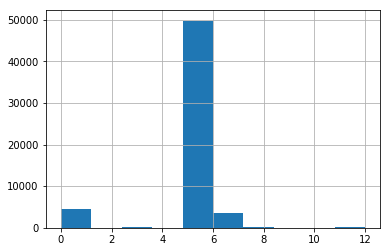

In [21]:
for_predict_df_prod['predict_rf'].hist()

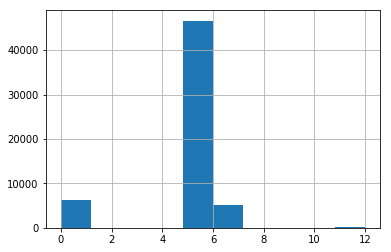

In [22]:
for_predict_df_prod['predict_cb'].hist()

In [682]:
def save_simple_model(model, name):
    import pickle
    from sklearn.externals import joblib
    with open(name, 'wb') as f:
         pickle.dump(model, f)
            
def load_simple_model(name):
    from sklearn.externals import joblib
    test_load_model = joblib.load(name)
    return test_load_model

def save_catboost_model(model, name):
    model.save_model(name)
    
def load_catboost_model(name):
    from catboost import CatBoostClassifier
    from_file = CatBoostClassifier()
    from_file.load_model(name)
    return from_file

In [683]:
save_simple_model(prod_OneVsRest_RandomForest_model, 'prod_OneVsRest_RandomForest_model_facies_7')
#save_catboost_model(catboost_GridSearchCV_model_best_prod, 'catboost_GridSearchCV_model_best_prod')